<a href="https://colab.research.google.com/github/Anamikabisht/book-recommendation-system/blob/main/bookRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)

100%|██████████| 24.3M/24.3M [00:01<00:00, 14.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3


In [ ]:
import os
files=os.listdir(path)
print(files)

['recsys_taxonomy2.png', 'Users.csv', 'DeepRec.png', 'Ratings.csv', 'classicRec.png', 'Books.csv']


In [ ]:
import pandas as pd

books = pd.read_csv(path + "/Books.csv")
ratings = pd.read_csv(path + "/Ratings.csv")
users = pd.read_csv(path + "/Users.csv")




/tmp/ipython-input-1061578059.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(path + "/Books.csv")


EDA

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
print("books : ",books.shape);
print("ratings : ",ratings.shape);
print("users : ",users.shape);

books :  (271360, 8)
ratings :  (1149780, 3)
users :  (278858, 3)


In [ ]:
print("\nMissing values:")
print("Books:\n", books.isnull().sum())
print("Users:\n", users.isnull().sum())
print("Ratings:\n", ratings.isnull().sum())


Missing values:
Books:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Users:
 User-ID          0
Location         0
Age         110762
dtype: int64
Ratings:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [ ]:
print("\nDuplicates:")
print("Books:", books.duplicated().sum())
print("Users:", users.duplicated().sum())
print("Ratings:", ratings.duplicated().sum())


Duplicates:
Books: 0
Users: 0
Ratings: 0


In [ ]:
print("\nRatings stats:\n", ratings['Book-Rating'].describe())
print("\nUser Age stats:\n", users['Age'].describe())



Ratings stats:
 count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

User Age stats:
 count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64


Visualizations

In [ ]:
import matplotlib.pyplot as plt

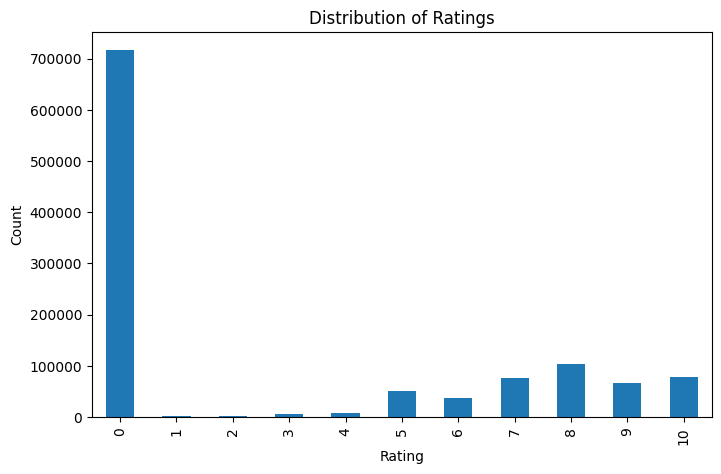

In [ ]:
plt.figure(figsize=(8,5))
ratings['Book-Rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


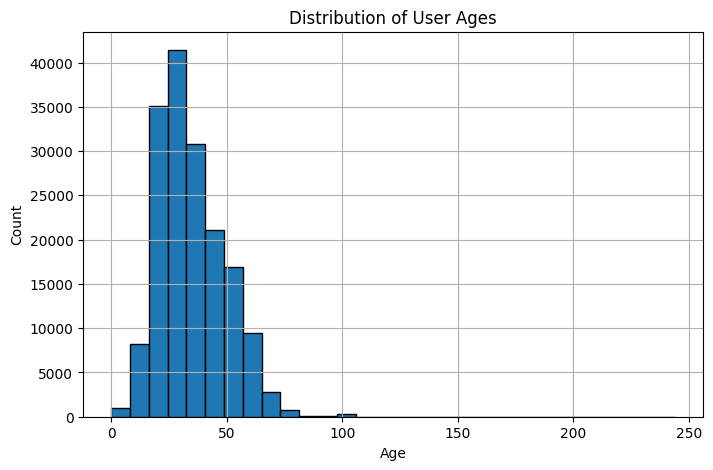

In [ ]:
plt.figure(figsize=(8,5))
users['Age'].hist(bins=30, edgecolor="black")
plt.title("Distribution of User Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


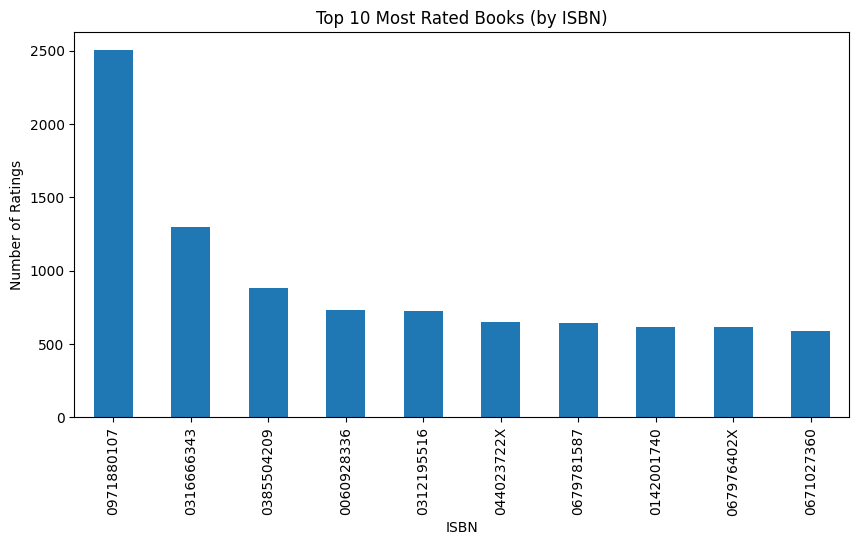

In [ ]:
top_books = ratings['ISBN'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_books.plot(kind='bar')
plt.title("Top 10 Most Rated Books (by ISBN)")
plt.xlabel("ISBN")
plt.ylabel("Number of Ratings")
plt.show()


Popularity based recommender

In [ ]:
ratings_with_name=ratings.merge(books,on='ISBN')

In [ ]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [ ]:
avg_rating_df = (
    ratings_with_name.groupby('Book-Title')['Book-Rating']
    .mean()
    .reset_index()
    .rename(columns={'Book-Rating': 'Average-Rating'})
)
avg_rating_df


,Book-Title,Average-Ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [ ]:
num_rating_df=ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'Total-Ratings'},inplace=True)
num_rating_df

,Book-Title,Total-Ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [ ]:
num_rating_df[num_rating_df['Book-Title'] == "Midnight"]


,Book-Title,Total-Ratings
120180,Midnight,135


In [ ]:
popular_df=num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,Total-Ratings,Average-Ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [ ]:
popular_df=popular_df[popular_df['Total-Ratings']>=250].sort_values('Avg-Ratings',ascending=False).head(50)


In [ ]:
print(books.columns)

In [ ]:
popular_df.merge(
    books,
    on='Book-Title'
)

In [ ]:
# The merge implicitly renames the columns that exist in both DataFrames
# based on the 'suffixes' parameter.
popular_df = popular_df.merge(
    books,
    on='Book-Title'
).drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'Total-Ratings', 'Avg-Ratings']]

popular_df.head()

In [ ]:
popular_df.rename(columns={
    'Book-Author_books': 'Book-Author',
    'Image-URL-L_books': 'Image-URL-L'
}, inplace=True)
popular_df.head()

In [ ]:
popular_df['Image-URL-M'][5]

Collaborative filtering based recommmender

In [ ]:
x=ratings_with_name.groupby('User-ID').count()['Book-Rating']>200
experienced_users=x[x].index
experienced_users

In [ ]:
filtered_rating=ratings_with_name[ratings_with_name['User-ID'].isin(experienced_users)]

In [ ]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books=y[y].index

In [ ]:
final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [ ]:
final_ratings.drop_duplicates()

In [ ]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt

In [ ]:
pt.fillna(0,inplace=True)
pt

In [ ]:
pt.shape

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores=cosine_similarity(pt)

In [ ]:
similarity_scores.shape

In [ ]:
import numpy as np


In [ ]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data


In [ ]:
books.drop_duplicates('Book-Title')

In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl',"wb"))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [ ]:
pickle.dump(pt,open('pt.pkl','wb'))